# Task 3 - To Explore Unsupervised Machine Learning


In [3]:
#import all necessary libraries.
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [5]:
#read csv file 
df = pd.read_csv(r'C:\Users\Maverick\Downloads\iris.csv')

In [6]:
#display top file content
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#get only independent variables for classification avoid dependent variables.
x = df.iloc[:, [0, 1, 2, 3]].values

In [13]:
print(x)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 

In [15]:
#Use elbow method to find suitable number of k value for givien dataset 
wcss = []                           #create list of with cluster sum square.
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0,max_iter=300,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

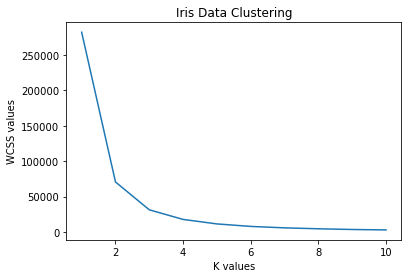

In [31]:
plt.plot(range(1,11),wcss)
plt.title('Iris Data Clustering')
plt.xlabel('K values')
plt.ylabel('WCSS values')
plt.show()

##### Conclusion : Here from elbow graph it is clear that k=3 is most suitable value for classification of given data.

In [18]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0,max_iter=300)


In [32]:
#here data get classified
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)          #displaying numerically classified data 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


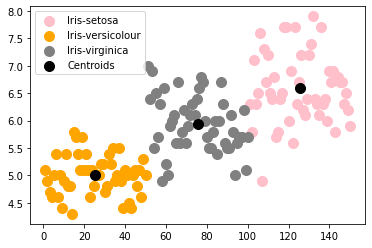

In [36]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'grey', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()